---
#### 1. 连续型随机变量及分布
`rv_continuous`

In [1]:
from scipy import stats
print([k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)])

['ksone', 'kstwo', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'truncweibull_min', 'weibull_max', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'geninvgauss', 'norminvgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gibrat', 'gilbrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'moyal', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'loguniform', 'reciprocal', 'rice', 'recipinvga

连续型随机变量的方法
|  方法  |                          内容                          |
| :----: | :----------------------------------------------------: |
| `rvs`  |   产生随机数，可以通过 `size` 参数指定输出的数组大小   |
| `pdf`  |                 随机变量的概率密度函数                 |
| `cdf`  |            随机变量的分布函数，`pdf` 的积分            |
|  `sf`  |            随机变量的生存函数，值为 `1-cdf`            |
| `ppf`  |                    分布函数的反函数                    |
| `stat` |                计算随机样本的期望和方差                |
| `fit`  | 对一组随机样本利用极大似然估计法，估计总体中的未知参数 |

常用连续型随机变量的概率密度函数
|    分布名称     |    关键字     |                           调用方式                           |
| :-------------: | :-----------: | :----------------------------------------------------------: |
|    均匀分布     | `uniform.pdf` |       `uniform.pdf(x, a, b)`：`[a,b]` 区间上的均匀分布       |
|    指数分布     |  `expon.pdf`  |    `expon.pdf(x, scale=theta)`：期望为 `theta` 的指数分布    |
|    正态分布     |  `norm.pdf`   | `norm.pdf(x, mu, sigma)`：均值为 `mu`，标准差为 `sigma` 的正态分布 |
| $\chi^{2}$ 分布 |  `chi2.pdf`   |       `chi2.pdf(x, n)`：自由度为 `n` 的 $\chi^2$ 分布        |
|    $t$ 分布     |    `t.pdf`    |           `t.pdf(x, n)`：自由度为 `n` 的 $t$ 分布            |
|    $F$ 分布     |    `f.pdf`    |       `f.pdf(x, m, n)`：自由度为 `m`，`n` 的 $F$ 分布        |
|  $\Gamma$ 分布  |  `gamma.pdf`  | `gamma.pdf(x, a=A, scale=B)`：形状参数为 `A`，尺度参数为 `B` 的 $\Gamma$ 分布 |

正态分布对应的主要函数
|     函数     |                           调用方式                           |
| :----------: | :----------------------------------------------------------: |
|   概率密度   | `norm.pdf(x, mu, sigma)`：均值为 `mu`，标准差 `sigma` 的正态分布概率密度函数 |
|   分布函数   | `norm.cdf(x, mu, sigma)`：均值为 `mu`，标准差 `sigma` 的正态分布的分布函数 |
|    分位数    | `norm.ppf(alpha, mu, sigma)`：均值为 `mu`，标准差 `sigma` 的正态分布 `alpha` 分位数 |
|    随机数    | `norm.rvs(mu, sigma, size=N)`：产生均值为 `mu`，标准差 `sigma` 的 `N` 个正态分布的随机数 |
| 极大似然估计 | `norm.fit(a)`：假设数组 `a` 来自正态分布，返回 `mu` 和 `sigma` 的最大似然估计 |

#### 2. 离散型随机变量及分布
`rv_discrete`

In [2]:
print([k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_discrete)])

['binom', 'bernoulli', 'betabinom', 'nbinom', 'geom', 'hypergeom', 'nhypergeom', 'logser', 'poisson', 'planck', 'boltzmann', 'randint', 'zipf', 'zipfian', 'dlaplace', 'skellam', 'yulesimon', 'nchypergeom_fisher', 'nchypergeom_wallenius']


离散型分布的方法大多数与连续型分布类似，但是概率密度函数 `pdf` 被替换为分布律函数 `pmf`

常用离散型随机变量的分布律函数
| 分布名称 |    关键字     |                   调用方式                    |
| :------: | :-----------: | :-------------------------------------------: |
| 二项分布 |  `binon.pmf`  |    `binom.pmf(x, n, p)`：计算 `x` 处的概率    |
| 几何分布 |  `geom.pmf`   | `geom.pmf(x, p)`：计算第 `x` 次首次成功的概率 |
| 泊松分布 | `poisson.pmf` |  `poisson.pmf(x, lambda)`：计算 `x` 处的概率  |

#### 3. 概率密度函数和分布律的可视化

In [3]:
from scipy.stats import expon, gamma
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

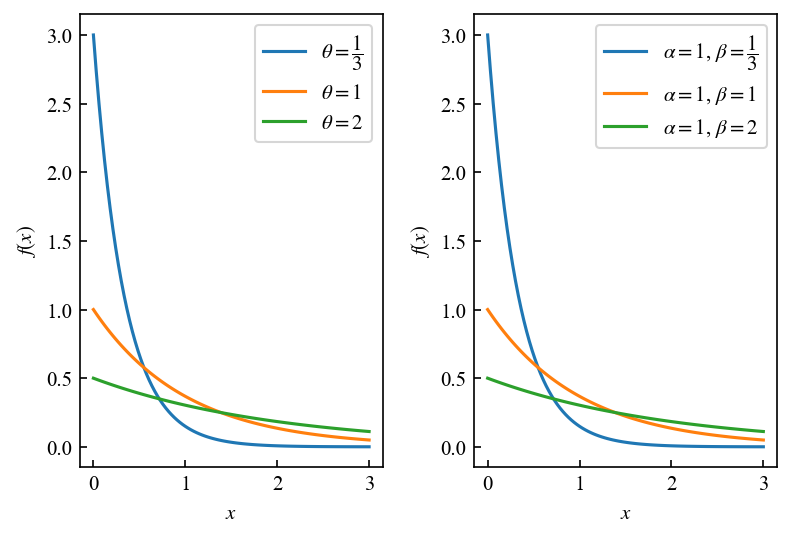

In [4]:
x = np.linspace(0, 3, 100)
L = [1/3, 1, 2]

fig = plt.figure(dpi=150)
ax = fig.add_subplot(121)
for i in L:
    ax.plot(x, expon.pdf(x, scale=i), label=rf"$\theta={i}$" if i != 1/3 else r'$\theta=\dfrac{1}{3}$')
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.legend()

ax1 = fig.add_subplot(122)
for i in L:
    ax1.plot(x, gamma.pdf(x, 1, scale=i), label=r'$\alpha=1$, ' + (rf"$\beta={i}$" if i != 1/3 else r'$\beta=\dfrac{1}{3}$'))
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()

fig.subplots_adjust(wspace=0.3)
fig.show()

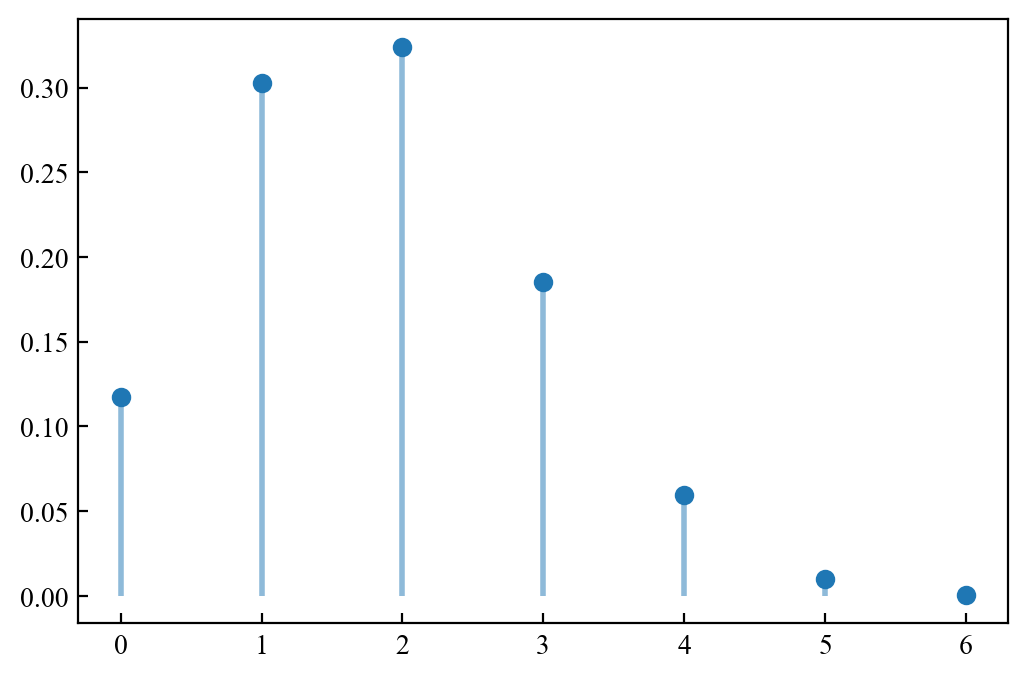

In [5]:
from scipy.stats import binom

n, p = 6, 0.3
x = np.arange(7)
y = binom.pmf(x, n, p)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.vlines(x, 0, y, lw=2, alpha=0.5)     # ax.vlines(x, ymin, ymax)
fig.show()

#### 4. 随机变量的概率计算和数字特征

In [7]:
from scipy.stats import norm
from scipy.optimize import fsolve

c1 = norm.ppf(0.25, 3, 2)

cf = lambda c: 1 - norm.cdf(c, 3, 2) - 3*norm.cdf(c, 3, 2)
c2 = fsolve(cf, 1)[0]

print(f'{c1 = }\n{c2 = }')

c1 = 1.6510204996078366
c2 = 1.6510204996078366


In [9]:
expon.stats(scale=3, moments='mvsk')

(array(3.), array(9.), array(2.), array(6.))